In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `data` is your original DataFrame
data = pd.read_csv(r"C:\Users\USER\Chameleon\MOP-Code\artificial-intelligence\Traffic Analysis\dataset\traffic_volume_analysis.csv")

data.head()

,road_name,location,suburb,speed_limit,average_speed,85th_percentile_speed,maximum_speed,road_segment,datetime,hour,...,year,road_name_encoded,location_encoded,suburb_encoded,Total_Traffic_Volume,month,month_name,day_type,Speeding_Incident,time_of_day
0,Wolseley Parade,North East Of Derby Street,Kensington,50,35.500000,40.400000,46.918791,21727,2014-10-11 16:00:00,16,...,2014,107,103,4,34.292179,10,October,Weekend,False,Afternoon
1,Wolseley Parade,North East Of Derby Street,Kensington,50,33.800000,40.700000,46.918791,21727,2014-10-11 17:00:00,17,...,2014,107,103,4,52.292179,10,October,Weekend,False,Afternoon
2,Wolseley Parade,North East Of Derby Street,Kensington,50,36.900000,42.900000,46.918791,21727,2014-10-11 18:00:00,18,...,2014,107,103,4,40.198183,10,October,Weekend,False,Evening
3,Wolseley Parade,North East Of Derby Street,Kensington,50,30.700000,33.700000,46.918791,21727,2014-11-11 02:00:00,2,...,2014,107,103,4,13.292179,11,November,Weekday,False,Night
4,Wolseley Parade,North East Of Derby Street,Kensington,50,32.298564,37.900167,46.918791,21727,2014-11-11 04:00:00,4,...,2014,107,103,4,96.469563,11,November,Weekday,False,Night


In [2]:

# Assuming 'data' is the DataFrame containing your data

# Calculate average traffic volume and speeding incident rate per road segment
segment_analysis = data.groupby('road_name').agg(
    average_volume=('Total_Traffic_Volume', 'mean'),
    speeding_incidents=('Speeding_Incident', 'sum'),
    total_records=('Speeding_Incident', 'count')
).reset_index()

# Calculate the sphigheeding incident rate
segment_analysis['speeding_rate'] = segment_analysis['speeding_incidents'] / segment_analysis['total_records']

# Create a combined metric (e.g., product of average volume and speeding rate)
segment_analysis['priority_score'] = segment_analysis['average_volume'] * segment_analysis['speeding_rate']

# Sort segments by the priority score
segment_analysis = segment_analysis.sort_values(by='priority_score', ascending=False)

# Filter segments that have a high priority score (you can adjust this threshold)
high_priority_segments = segment_analysis[segment_analysis['priority_score'] > segment_analysis['priority_score'].quantile(0.9)]

# Display the top segments needing attention
high_priority_segments


,road_name,average_volume,speeding_incidents,total_records,speeding_rate,priority_score
95,Spencer Street,844.536159,325,336,0.967262,816.887654
57,King Street,834.741052,294,336,0.875000,730.398421
32,Flemington Road,594.391979,336,336,1.000000,594.391979
91,Rathdowne Street,515.213319,672,1008,0.666667,343.475546
29,Epsom Road,331.273450,335,336,0.997024,330.287517
43,Grattan Street,413.640314,354,504,0.702381,290.533077
101,Victoria Street,289.375132,655,672,0.974702,282.054630
46,Harbour Esplanade,258.961133,1116,1152,0.968750,250.868598
28,Elizabeth Street,249.807460,576,576,1.000000,249.807460
37,Gatehouse Street,241.860105,1670,1680,0.994048,240.420462


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


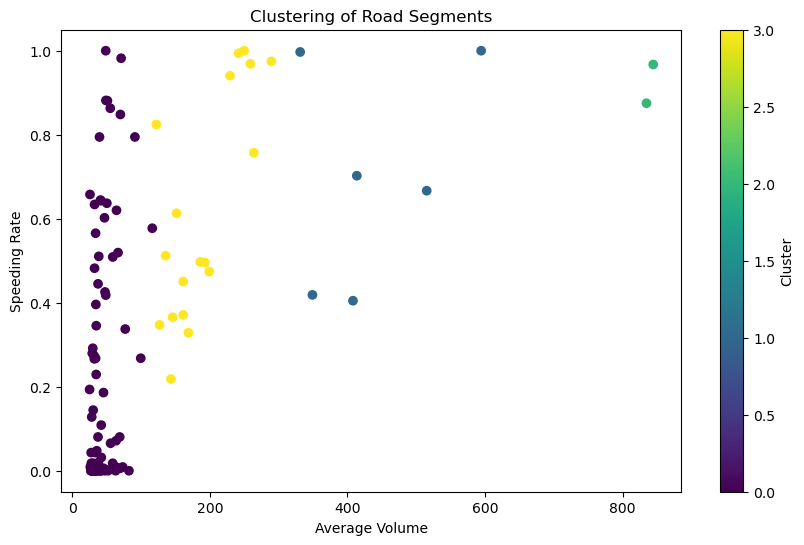

,cluster,count,avg_volume,avg_speeding_rate
0,0,82,44.682890,0.246709
1,1,6,435.282379,0.698247
2,2,2,839.638606,0.921131
3,3,18,190.452022,0.618425


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform clustering on the segments based on average volume and speeding rate
X = segment_analysis[['average_volume', 'speeding_rate']]
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
segment_analysis['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(segment_analysis['average_volume'], segment_analysis['speeding_rate'], c=segment_analysis['cluster'], cmap='viridis')
plt.xlabel('Average Volume')
plt.ylabel('Speeding Rate')
plt.title('Clustering of Road Segments')
plt.colorbar(label='Cluster')
plt.show()

# Analyzing clusters
cluster_summary = segment_analysis.groupby('cluster').agg(
    count=('road_name', 'size'),
    avg_volume=('average_volume', 'mean'),
    avg_speeding_rate=('speeding_rate', 'mean')
).reset_index()

cluster_summary
